# Birthing a Simple Perceptron

Date May 21, 2018

The following experiment implements a perceptron in a Python class with a number of class variables and two class methods: train and predict. 

A perceptron is the basic atomic working unit of neural networks, popular structures that today helps facilitate computing implementation algorithms for problems in deep learning. 

More on perceptron --> https://en.wikipedia.org/wiki/Perceptron

More on activation functions -> https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f

BlueberryTron named after our dog 'Blueberry'


In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [167]:
# types of activation functions

def activat1(x):
    return np.tanh(x)         # tanh or f(x) = 1 — exp(-2x) / 1 + exp(-2x);

def activat2(x):              # binary activation, a type of relu or rectified linear 
    if x >= 0:
        return 1
    else:
        return -1

def activat3(x):             # sigmoid -> f(x) = 1 / 1 + exp(-x)
    return 1 / (1 + np.exp(-x))


In [181]:
#perceptron class using activate function 2
class perceptron2(object):
    def __init__(self,dim):
        self.dim = dim #input space dimension
        self.lr = 0.1 #learning rate
        self.w = np.array([0.001]*(dim+1)) #+1 for bias
        self.cycles = 0 #counter for number of loop cycles
        self.converger = 100 #check for convergence
        self.maxiter = 10000 #max num of iterations before the loop stops
        self.toler = 0.001 #tolerance
        self.errors = 0 #number of wrong prediction in the testing set 
    
    #training algorithm
    def train(self, X, y):
        
        little_w = 0 #counter for little changes of bias
        
        while(little_w < self.converger and self.cycles < self.maxiter):
            
            i = np.random.randint(0, len(X))
            x_vec  = np.concatenate(([1],X[i])) #random example with bias
            d = y[i] #desired output for the selected example

            old_w = self.w
            self.w = self.w + self.lr*(d - activat2(np.dot(self.w, x_vec)))*x_vec #Learning Rule using activat2

            if np.linalg.norm(self.w - old_w) < self.toler:
                little_w = little_w + 1
            else:
                little_w = 0 #if w changed enough we reset the counter

            self.cycles = self.cycles + 1
    
    #predict algorithm        
    def predict(self, X_pred, y_des):
        y_pred = ['error']*len(X_pred) #we initialize the vector of predictions
        for i in range( len(X_pred) ):
            x_vec = np.concatenate( ([1],X_pred[i])) #example selected with bias
            y_pred[i] = activat2(np.dot(self.w, x_vec)) #computing the prediction
            if (y_pred[i] != y_des[i]): #if the prediction is uncorrect
                self.errors = self.errors + 1 #add 1 to the errors counter
            
        return y_pred

In [182]:
# Train Set
Npoints = 100
xcomp = np.linspace(0,np.pi, Npoints)

red_gauss = np.random.normal(size=Npoints, loc=0, scale=2)
redPts = np.array([np.array([xcomp[i],3*xcomp[i] + red_gauss[i]]) for i in range(100)])
redDes = np.repeat(-1,100)

blue_gauss = np.random.normal(size=Npoints, loc=8, scale=2)
bluePts = np.array([ np.array([xcomp[i],3*xcomp[i] + blue_gauss[i]]) for i in range(100)])
blueDes = np.repeat(1,100)

X_train = np.concatenate((redPts,bluePts))
y_train = np.concatenate((redDes,blueDes))

In [183]:
# Test Set
Npoints = 50
xcomp = np.linspace(0, np.pi, Npoints)

red_gauss = np.random.normal(size=Npoints, loc=0, scale=2)
redPts = np.array([np.array([xcomp[i],3*xcomp[i] + red_gauss[i]]) for i in range(Npoints)])
redDes = np.repeat(-1,Npoints)

blue_gauss = np.random.normal(size=Npoints, loc=8, scale=2)
bluePts = np.array([ np.array([xcomp[i],3*xcomp[i] + blue_gauss[i]]) for i in range(Npoints)])
blueDes = np.repeat(1,Npoints)

X_test = np.concatenate((redPts,bluePts))
y_test = np.concatenate((redDes,blueDes))

In [184]:
# Model using activate function 2
dimension = X_train.shape[1]
Blueberrytron = perceptron2(dimension)
Blueberrytron.train(X_train, y_train)
Blueberrytron.predict(X_test, y_test)

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

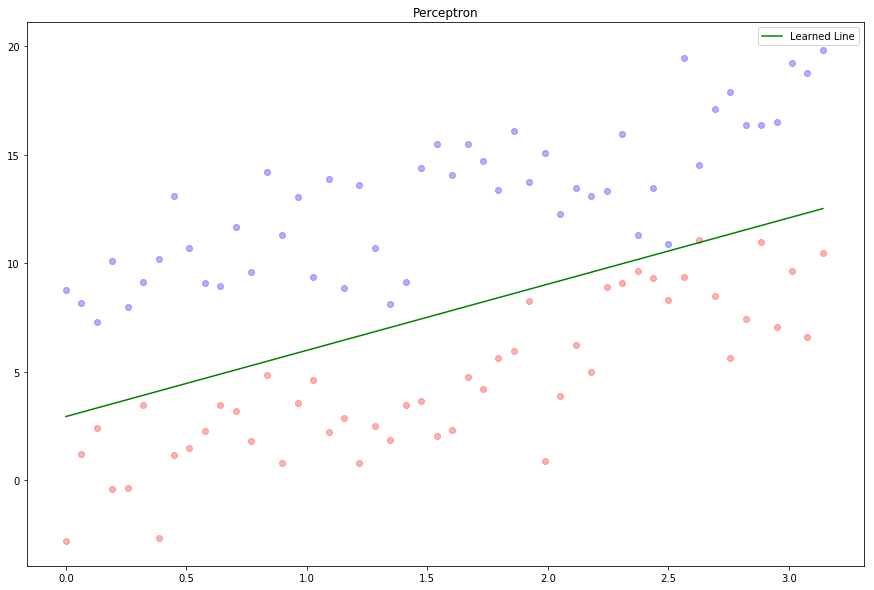

In [185]:
plt.figure(figsize=(15,10))
for i in range(Npoints):
    plt.scatter(redPts[i,0],redPts[i,1],alpha = 0.3,c='r')
    plt.scatter(bluePts[i,0],bluePts[i,1],alpha = 0.3,c='b')
weights = Blueberrytron.w
plt.plot(xcomp, -(weights[1]*xcomp + weights[0])/weights[2] , 'g-',label='Learned Line') 
plt.savefig('Blueberrytron.png')
plt.title('Perceptron')
plt.legend()
plt.show()

# Try TanH

In [186]:
#perceptron class using activate function 1 tanh
class perceptron1(object):
    def __init__(self,dim):
        self.dim = dim #input space dimension
        self.lr = 0.1 #learning rate
        self.w = np.array([0.001]*(dim+1)) #+1 for bias
        self.cycles = 0 #counter for number of loop cycles
        self.converger = 100 #check for convergence
        self.maxiter = 10000 #max num of iterations before the loop stops
        self.toler = 0.001 #tolerance
        self.errors = 0 #number of wrong prediction in the testing set 
    
    #training algorithm
    def train(self, X, y):
        
        little_w = 0 #counter for little changes of bias
        
        while(little_w < self.converger and self.cycles < self.maxiter):
            
            i = np.random.randint(0, len(X))
            x_vec  = np.concatenate( ([1],X[i])) #random example with bias
            d = y[i] #desired output for the selected example

            old_w = self.w
            self.w = self.w + self.lr*(d - activat1(np.dot(self.w, x_vec)))*x_vec #Learning Rule using tanh

            if np.linalg.norm(self.w - old_w) < self.toler:
                little_w = little_w + 1
            else:
                little_w = 0 #if w changed enough we reset the counter

            self.cycles = self.cycles + 1
            
    def predict(self, X_pred, y_des):
        y_pred = ['error']*len(X_pred) #we initialize the vector of predictions
        for i in range( len(X_pred) ):
            x_vec = np.concatenate( ([1],X_pred[i])) #example selected with bias
            y_pred[i] = activat1(np.dot(self.w, x_vec)) #computing the prediction
            if (y_pred[i] != y_des[i]): #if the prediction is uncorrect
                self.errors = self.errors + 1 #add 1 to the errors counter
            
        return y_pred

In [187]:
dimension = X_train.shape[1]
Blueberrytron = perceptron1(dimension)
Blueberrytron.train(X_train, y_train)
Blueberrytron.predict(X_test, y_test)

[-1.0,
 -0.9999999999999997,
 -0.9999999999742971,
 -1.0,
 -1.0,
 -0.9999999959377672,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -0.9999999999999142,
 -0.9999999999999994,
 -1.0,
 -0.999999999565795,
 -1.0,
 -1.0,
 -0.9999999999999463,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -0.9999999989994397,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -0.9999999999751588,
 -0.9999999999731963,
 -0.9999999991259012,
 -0.9999999999956454,
 -1.0,
 -0.9999999999999076,
 -0.999998660755831,
 -1.0,
 -1.0,
 -1.0,
 -0.9999999999025324,
 -1.0,
 -1.0,
 -1.0,
 -0.9999999999999999,
 1.0,
 1.0,
 0.9999999999989353,
 1.0,
 0.9999999999999537,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999999999999,
 0.9999999999996231,
 1.0,
 0.9999999999999755,
 1.0,
 1.0,
 1.0,
 0.9999999984253712,
 1.0,
 0.9999605155627859,
 1.0,
 0.999999999994673,
 -0.9336272272322385,
 0.990430495859896,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999749195003,
 0.9999999999996082,
 0.9999999998088853,
 0.9999999

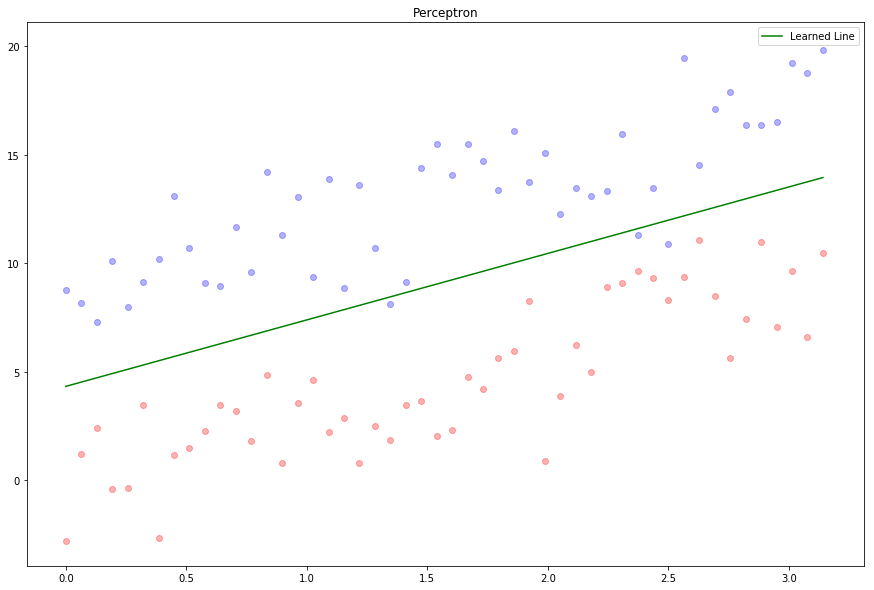

In [188]:
plt.figure(figsize=(15,10))
for i in range(Npoints):
    plt.scatter(redPts[i,0],redPts[i,1],alpha = 0.3,c='r')
    plt.scatter(bluePts[i,0],bluePts[i,1],alpha = 0.3,c='b')
weights = Blueberrytron.w
plt.plot(xcomp, -(weights[1]*xcomp + weights[0])/weights[2] , 'g-',label='Learned Line') 
plt.savefig('Blueberrytron.png')
plt.title('Perceptron')
plt.legend()
plt.show()

# Try Sigmoid

In [189]:
#perceptron class using activate function 3 sigmoid
class perceptron3(object):
    def __init__(self,dim):
        self.dim = dim #input space dimension
        self.lr = 0.1 #learning rate
        self.w = np.array([0.001]*(dim+1)) #+1 for bias
        self.cycles = 0 #counter for number of loop cycles
        self.converger = 100 #check for convergence
        self.maxiter = 10000 #max num of iterations before the loop stops
        self.toler = 0.001 #tolerance
        self.errors = 0 #number of wrong prediction in the testing set 
    
    #training algorithm
    def train(self, X, y):
        
        little_w = 0 #counter for little changes of bias
        
        while(little_w < self.converger and self.cycles < self.maxiter):
            
            i = np.random.randint(0, len(X))
            x_vec  = np.concatenate( ([1],X[i])) #random example with bias
            d = y[i] #desired output for the selected example

            old_w = self.w
            self.w = self.w + self.lr*(d - activat3(np.dot(self.w, x_vec)))*x_vec #Learning Rule using sigmoid

            if np.linalg.norm(self.w - old_w) < self.toler:
                little_w = little_w + 1
            else:
                little_w = 0 #if w changed enough we reset the counter

            self.cycles = self.cycles + 1
            
    def predict(self, X_pred, y_des):
        y_pred = ['error']*len(X_pred) #we initialize the vector of predictions
        for i in range( len(X_pred) ):
            x_vec = np.concatenate( ([1],X_pred[i])) #example selected with bias
            y_pred[i] = activat3(np.dot(self.w, x_vec)) #computing the prediction
            if (y_pred[i] != y_des[i]): #if the prediction is uncorrect
                self.errors = self.errors + 1 #add 1 to the errors counter
            
        return y_pred

In [190]:
dimension = X_train.shape[1]
Blueberrytron = perceptron3(dimension)
Blueberrytron.train(X_train, y_train)
Blueberrytron.predict(X_test, y_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


[2.74489031595976e-220,
 1.4610051834790667e-109,
 5.448029114148333e-83,
 8.036948825510817e-179,
 5.190736902336901e-188,
 3.3406178785631926e-82,
 3.867592575327766e-278,
 1.4179412189286872e-172,
 1.5349155351385357e-173,
 1.3828145087116267e-160,
 4.525193108735291e-134,
 1.2204314422614964e-152,
 1.2632383697544148e-204,
 1.1033933927024828e-123,
 5.396577357867205e-257,
 9.274187291337666e-184,
 7.766747034577813e-162,
 9.095374672107276e-245,
 6.85316140240005e-235,
 2.4759835582960683e-308,
 3.8045297091727095e-267,
 6.065511748031424e-297,
 8.736097704179072e-258,
 3.66587158250759e-263,
 0.0,
 0.0,
 1.7107253573173362e-260,
 2.6403758132264377e-287,
 4.2831009323520965e-255,
 5.0316038761762624e-256,
 2.32099142055053e-196,
 0.0,
 0.0,
 1.218074126164209e-288,
 0.0,
 1.1887914467764032e-228,
 7.491354067247004e-233,
 1.2992302818604374e-227,
 1.0461226399903972e-246,
 8.492588276233224e-288,
 3.366302629659078e-266,
 6.037458363962338e-225,
 0.0,
 0.0,
 0.0,
 5.6198705550432

In [191]:
np.exp(.08310169374426e-268)

1.0

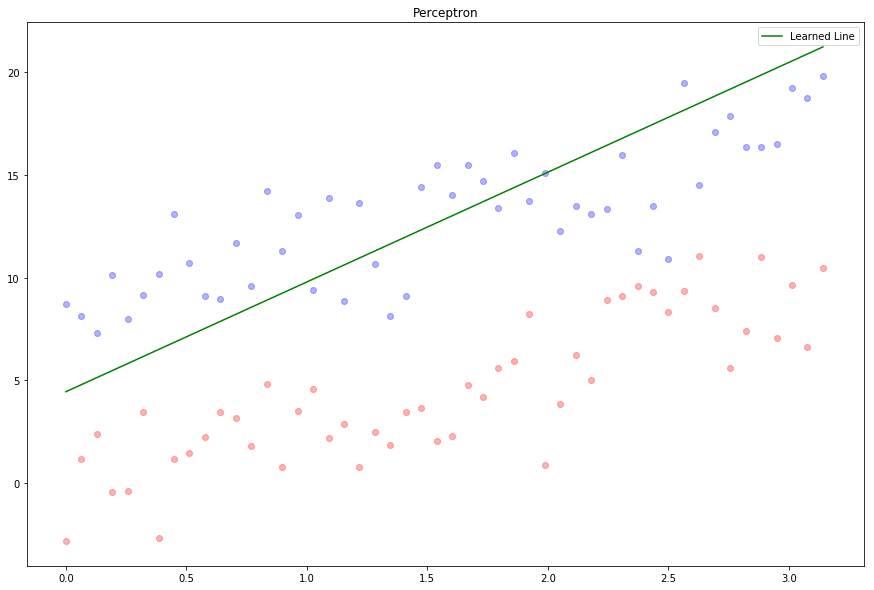

In [192]:
plt.figure(figsize=(15,10))
for i in range(Npoints):
    plt.scatter(redPts[i,0],redPts[i,1],alpha = 0.3,c='r')
    plt.scatter(bluePts[i,0],bluePts[i,1],alpha = 0.3,c='b')
weights = Blueberrytron.w
plt.plot(xcomp, -(weights[1]*xcomp + weights[0])/weights[2] , 'g-',label='Learned Line') 
plt.savefig('Blueberrytron.png')
plt.title('Perceptron')
plt.legend()
plt.show()

# Observations

The behavior of the sigmoid activation function, as written, degrades as the model moves forward because of the gradient problem. That is, a continuous activation function needs to be continuously differentiable so the steepest descent can be fully utilized while minimizing the error function. Thus the sigmoid will need to be rewritten.